# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

## Inicialización

In [130]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as pt 
from scipy import stats as st
# Cargar todas las librerías



## Cargar datos

In [131]:
calls_df = pd.read_csv ('/datasets/megaline_calls.csv')
internet_df = pd.read_csv ('/datasets/megaline_internet.csv' )
messages_df = pd.read_csv ('/datasets/megaline_messages.csv')
plans_df = pd.read_csv ('/datasets/megaline_plans.csv')
users_df = pd.read_csv ('/datasets/megaline_users.csv')# Carga los archivos de datos en diferentes DataFrames



## Preparar los datos

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]

## Tarifas

In [132]:
plans_df.info()# Imprime la información general/resumida sobre el DataFrame de las tarifas



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [133]:
plans_df.head()# Imprime una muestra de los datos para las tarifas



,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

Nuestro pago se describe en gb mientras que el consumo se realiza en mb, ¿habrá que hacer una conversión?. 

## Corregir datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

No hay correcciones para esete data frame

## Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

No hay enriquecimiento para este data frame de momento.

## Usuarios/as

In [134]:
users_df.info()# Imprime la información general/resumida sobre el DataFrame de usuarios



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [135]:
users_df.sample()# Imprime una muestra de datos para usuarios



,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
228,1228,Jude,Hale,26,"Detroit-Warren-Dearborn, MI MSA",2018-04-15,surf,NaN


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

Nuestra tabla contiene un total de 8 columnas, en las que podemos ver que la columna **churn-date** unicamente tiene 466 datos marcados como nulos, al checar los datos, se pudo ver que estos eran congruentes a la información dada y que no era necesario realizar alguna corrección o cambio, según nuestra columna esta información unicamente se llena cuando se ha decidido cancelar el plan, por lo que se asume que los 466 datos nulos, pertenecen a usuarios que siguen usando el servicio. 

Además de eso, se notaron algunas columnas en las que se plantea hacer algunas correciones; la columna de **id** cambiara de nombre a **user_id** debido a que en otras tablas tenemos columnas con ese mismo nombre y es importante diferenciar cada una de eelas para evitar posibles confusiones. Tanto para las columnas de **reg_date** y **churn_date** podemos observar que los datos proporcionados son fechas pero el formato de estos es "object" lo cual lo hace un tranto inconveniente para realizar uso de estos datos en el futuro, por lo que se buscará realizar un cambio de formato a "date". 


### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [139]:
users_df.rename(columns={'plan_id':'plan_name'},inplace =True)

In [8]:
users_df['reg_date'] = pd.to_datetime(users_df['reg_date'],format = '%Y-%m-%d')


In [9]:
users_df['churn_date'] = pd.to_datetime(users_df['churn_date'],format = '%Y-%m-%d')


In [10]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [11]:
users_df ['reg_mes'] = pd.DatetimeIndex(users_df['reg_date']).month
users_df ['churn_mes'] = pd.DatetimeIndex(users_df['churn_date']).month


In [12]:
users_df.head()


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,reg_mes,churn_mes
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,12,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,8,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,10,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT,1,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT,5,NaN


In [13]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
 8   reg_mes     500 non-null    int64         
 9   churn_mes   34 non-null     float64       
dtypes: datetime64[ns](2), float64(1), int64(3), object(4)
memory usage: 39.2+ KB


## Llamadas

In [14]:
calls_df.info()# Imprime la información general/resumida sobre el DataFrame de las llamadas



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [15]:
calls_df.sample()# Imprime una muestra de datos para las llamadas



,id,user_id,call_date,duration
67350,1241_186,1241,2018-12-17,4.25


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

Aquí la columna de **id** cambiara de nombre a **calls_id debido** a que en otras tablas tenemos columnas con ese mismo nombre y es importante diferenciar cada una de ellas para evitar posibles confusiones. 

Para la columna de **call_date** se observa que los datos proporcionados son fechas pero el formato de estos es "object" lo cual lo hace un tranto inconveniente para realizar uso de estos datos en el futuro, por lo que se buscará realizar un cambio de formato a "date".

Se realizará una columna que nos indica del mes, para saber que llamadas se realizaron durante cada mes.

Por último, se realizará una nueva columna, la cual tomara los datos de duración y los redondeara al siguiente numero, contando solo minutos y no segundos.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [16]:
calls_df.rename(columns={'id':'calls_id'}, inplace = True)

In [17]:
calls_df.sample()

,calls_id,user_id,call_date,duration
131785,1474_182,1474,2018-11-17,2.52


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [18]:
calls_df['call_date'] = pd.to_datetime(calls_df['call_date'],format = '%Y-%m-%d')

In [19]:
calls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   calls_id   137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


In [20]:
calls_df ['mes'] = pd.DatetimeIndex(calls_df['call_date']).month

In [21]:
calls_df.head()

,calls_id,user_id,call_date,duration,mes
0,1000_93,1000,2018-12-27,8.52,12
1,1000_145,1000,2018-12-27,13.66,12
2,1000_247,1000,2018-12-27,14.48,12
3,1000_309,1000,2018-12-28,5.76,12
4,1000_380,1000,2018-12-30,4.22,12


In [22]:
import math

calls_df['duracion_redondeada_prueba'] = calls_df['duration'].apply(math.ceil)

In [23]:
calls_df.head()

,calls_id,user_id,call_date,duration,mes,duracion_redondeada_prueba
0,1000_93,1000,2018-12-27,8.52,12,9
1,1000_145,1000,2018-12-27,13.66,12,14
2,1000_247,1000,2018-12-27,14.48,12,15
3,1000_309,1000,2018-12-28,5.76,12,6
4,1000_380,1000,2018-12-30,4.22,12,5


In [24]:
import math
def redondeo_llamadas(duracion): 
    redondeo = math.ceil(duracion)
    return redondeo

In [25]:
calls_df['duracion_redondeada'] = calls_df['duration'].apply(redondeo_llamadas)

In [26]:
calls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 7 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   calls_id                    137735 non-null  object        
 1   user_id                     137735 non-null  int64         
 2   call_date                   137735 non-null  datetime64[ns]
 3   duration                    137735 non-null  float64       
 4   mes                         137735 non-null  int64         
 5   duracion_redondeada_prueba  137735 non-null  int64         
 6   duracion_redondeada         137735 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 7.4+ MB


In [27]:
calls_df.head()

,calls_id,user_id,call_date,duration,mes,duracion_redondeada_prueba,duracion_redondeada
0,1000_93,1000,2018-12-27,8.52,12,9,9
1,1000_145,1000,2018-12-27,13.66,12,14,14
2,1000_247,1000,2018-12-27,14.48,12,15,15
3,1000_309,1000,2018-12-28,5.76,12,6,6
4,1000_380,1000,2018-12-30,4.22,12,5,5


## Mensajes

In [28]:
messages_df.info()# Imprime la información general/resumida sobre el DataFrame de los mensajes



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [29]:
messages_df.sample()# Imprime una muestra de datos para los mensajes



,id,user_id,message_date
26233,1159_236,1159,2018-10-10


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

Aquí la columna de **id** cambiara de nombre a **message_id** debido a que en otras tablas tenemos columnas con ese mismo nombre y es importante diferenciar cada una de ellas para evitar posibles confusiones.

Para la columna de message_date se observa que los datos proporcionados son fechas pero el formato de estos es "object" lo cual lo hace un tranto inconveniente para realizar uso de estos datos en el futuro, por lo que se buscará realizar un cambio de formato a "date".

Se realizará una columna que nos indica del mes, para saber los mensajes que fueron enviados durante cada mes.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [30]:
messages_df['messages_date'] = pd.to_datetime( messages_df['message_date'], format= '%Y-%m-%d')

In [31]:
messages_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             76051 non-null  object        
 1   user_id        76051 non-null  int64         
 2   message_date   76051 non-null  object        
 3   messages_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 2.3+ MB


In [32]:
messages_df.rename(columns={'id':'message_id'}, inplace = True)

In [33]:
messages_df.sample()

,message_id,user_id,message_date,messages_date
39129,1255_111,1255,2018-12-16,2018-12-16


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [34]:
messages_df['month'] = pd.DatetimeIndex(messages_df['message_date']).month

In [35]:
messages_df.head()

,message_id,user_id,message_date,messages_date,month
0,1000_125,1000,2018-12-27,2018-12-27,12
1,1000_160,1000,2018-12-31,2018-12-31,12
2,1000_223,1000,2018-12-31,2018-12-31,12
3,1000_251,1000,2018-12-27,2018-12-27,12
4,1000_255,1000,2018-12-26,2018-12-26,12


## Internet

In [36]:
internet_df.info()# Imprime la información general/resumida sobre el DataFrame de internet



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [37]:
internet_df.sample()# Imprime una muestra de datos para el tráfico de internet



,id,user_id,session_date,mb_used
52286,1236_131,1236,2018-04-06,317.68


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

Aquí la columna de **id** cambiara de nombre a **internet_id** debido a que en otras tablas tenemos columnas con ese mismo nombre y es importante diferenciar cada una de ellas para evitar posibles confusiones. 

Para la columna de **session_date** se observa que los datos proporcionados son fechas pero el formato de estos es "object" lo cual lo hace un tranto inconveniente para realizar uso de estos datos en el futuro, por lo que se buscará realizar un cambio de formato a "date".

Se realizará una columna que nos indica del mes, para saber cuanto internet se utilizo durante cada mes.

La información de la columna de **mb_used** esta en mb pero el cobro se realiza en Gb, por lo que se hará un ajuste para saber cuantos gb se usan, para esto, se realizará una nueva columna, la cual tomara los mb y los redondeara a gb, contando solo gb y no mb.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [38]:
internet_df['session_date'] = pd.to_datetime( internet_df['session_date'], format= '%Y-%m-%d')

In [39]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


In [40]:
internet_df.rename(columns={'id':'internet_id'}, inplace = True)

In [41]:
internet_df.sample()

,internet_id,user_id,session_date,mb_used
11595,1056_262,1056,2018-09-15,342.29


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [42]:
internet_df ['mes']=pd.DatetimeIndex(internet_df['session_date']).month

In [43]:
internet_df.head()

,internet_id,user_id,session_date,mb_used,mes
0,1000_13,1000,2018-12-29,89.86,12
1,1000_204,1000,2018-12-31,0.00,12
2,1000_379,1000,2018-12-28,660.40,12
3,1000_413,1000,2018-12-26,270.99,12
4,1000_442,1000,2018-12-27,880.22,12


In [44]:
internet_df.describe()

,user_id,mb_used,mes
count,104825.000000,104825.000000,104825.000000
mean,1242.496361,366.713701,9.342552
std,142.053913,277.170542,2.400404
min,1000.000000,0.000000,1.000000
25%,1122.000000,136.080000,8.000000
50%,1236.000000,343.980000,10.000000
75%,1367.000000,554.610000,11.000000
max,1499.000000,1693.470000,12.000000


Se puede observar  que hay usuarios que no utilizan los mb, pues en el minimo es 0. ¿Que cantidad de estos usauarios no utilizaran los mb?

In [45]:
(len(internet_df.query('mb_used == 0' ))/len(internet_df))*100

13.11423801574052

Resulto que un **13%** de los usuarios no utilizan este beneficio.

## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [46]:
costo_mes_surf = 20 
minutos_surf = 500
messages_surf= 50 
datos_surf = 15
costo_llamada_surf = 0.03
costo_message_surf = 0.03
costo_datos_surf = 10

costo_mes_ultimate= 70 
minutos_ultimate = 3000
messages_ultimate = 1000 
datos_ultimate = 30
costo_llamada_ultimate = 0.01
costo_message_ultimate = 0.01
costo_datos_ultimate = 7
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras



## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [47]:
calls_df.head()

,calls_id,user_id,call_date,duration,mes,duracion_redondeada_prueba,duracion_redondeada
0,1000_93,1000,2018-12-27,8.52,12,9,9
1,1000_145,1000,2018-12-27,13.66,12,14,14
2,1000_247,1000,2018-12-27,14.48,12,15,15
3,1000_309,1000,2018-12-28,5.76,12,6,6
4,1000_380,1000,2018-12-30,4.22,12,5,5


In [48]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.



In [49]:
calls_analytics = calls_df.pivot_table(index= ['user_id','mes'], values = 'duracion_redondeada', aggfunc = ['sum','count'])# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.



In [50]:
calls_analytics.columns= ['minutos usados', 'llamadas hechas']

In [51]:
calls_analytics = calls_analytics.reset_index()

In [52]:
calls_analytics

,user_id,mes,minutos usados,llamadas hechas
0,1000,12,124,16
1,1001,8,182,27
2,1001,9,315,49
3,1001,10,393,65
4,1001,11,426,64
...,...,...,...,...
2253,1498,12,339,39
2254,1499,9,346,41
2255,1499,10,385,53
2256,1499,11,308,45


In [53]:
messages_df.sample()

,message_id,user_id,message_date,messages_date,month
10156,1076_353,1076,2018-12-12,2018-12-12,12


In [54]:
messages_analytics = messages_df.pivot_table( index = ['user_id', 'month'] , values = 'message_id',aggfunc = 'count') # Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.



In [55]:
messages_analytics.columns= ['cantidad_de_mensajes']

In [56]:
messages_analytics = messages_analytics.reset_index()

In [57]:
messages_analytics.rename(columns={'month':'mes'}, inplace=True)

In [58]:
messages_analytics

,user_id,mes,cantidad_de_mensajes
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


In [59]:
internet_df.head()

,internet_id,user_id,session_date,mb_used,mes
0,1000_13,1000,2018-12-29,89.86,12
1,1000_204,1000,2018-12-31,0.00,12
2,1000_379,1000,2018-12-28,660.40,12
3,1000_413,1000,2018-12-26,270.99,12
4,1000_442,1000,2018-12-27,880.22,12


In [60]:
internet_analytics = internet_df.pivot_table(index=['user_id','mes'], values = 'mb_used', aggfunc= 'sum')# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.



In [61]:
internet_analytics.columns = ['datos_usados']

In [62]:
internet_analytics = internet_analytics.reset_index()

In [63]:
internet_analytics

,user_id,mes,datos_usados
0,1000,12,1901.47
1,1001,8,6919.15
2,1001,9,13314.82
3,1001,10,22330.49
4,1001,11,18504.30
...,...,...,...
2272,1498,12,23137.69
2273,1499,9,12984.76
2274,1499,10,19492.43
2275,1499,11,16813.83


In [64]:
def redondeo_datos(mb): 
    redondeo = math.ceil (mb/1024)
    return redondeo

In [65]:
internet_analytics ['datos_usados_gb'] = internet_analytics['datos_usados'].apply(redondeo_datos)

In [66]:
internet_analytics

,user_id,mes,datos_usados,datos_usados_gb
0,1000,12,1901.47,2
1,1001,8,6919.15,7
2,1001,9,13314.82,14
3,1001,10,22330.49,22
4,1001,11,18504.30,19
...,...,...,...,...
2272,1498,12,23137.69,23
2273,1499,9,12984.76,13
2274,1499,10,19492.43,20
2275,1499,11,16813.83,17


[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [67]:
calls_analytics

,user_id,mes,minutos usados,llamadas hechas
0,1000,12,124,16
1,1001,8,182,27
2,1001,9,315,49
3,1001,10,393,65
4,1001,11,426,64
...,...,...,...,...
2253,1498,12,339,39
2254,1499,9,346,41
2255,1499,10,385,53
2256,1499,11,308,45


In [68]:
messages_analytics

,user_id,mes,cantidad_de_mensajes
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


In [69]:
calls_messages = calls_analytics.merge(messages_analytics, on= ['user_id','mes'], how ='outer')# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month



In [70]:
calls_messages

,user_id,mes,minutos usados,llamadas hechas,cantidad_de_mensajes
0,1000,12,124.0,16.0,11.0
1,1001,8,182.0,27.0,30.0
2,1001,9,315.0,49.0,44.0
3,1001,10,393.0,65.0,53.0
4,1001,11,426.0,64.0,36.0
...,...,...,...,...,...
2286,1349,10,NaN,NaN,76.0
2287,1349,11,NaN,NaN,72.0
2288,1349,12,NaN,NaN,61.0
2289,1361,5,NaN,NaN,2.0


In [71]:
consumo = calls_messages.merge(internet_analytics, on= ['user_id','mes'], how ='outer')

In [72]:
consumo

,user_id,mes,minutos usados,llamadas hechas,cantidad_de_mensajes,datos_usados,datos_usados_gb
0,1000,12,124.0,16.0,11.0,1901.47,2.0
1,1001,8,182.0,27.0,30.0,6919.15,7.0
2,1001,9,315.0,49.0,44.0,13314.82,14.0
3,1001,10,393.0,65.0,53.0,22330.49,22.0
4,1001,11,426.0,64.0,36.0,18504.30,19.0
...,...,...,...,...,...,...,...
2288,1349,12,NaN,NaN,61.0,13039.91,13.0
2289,1361,5,NaN,NaN,2.0,1519.69,2.0
2290,1482,10,NaN,NaN,2.0,NaN,NaN
2291,1108,12,NaN,NaN,NaN,233.17,1.0


In [73]:
plans_df# Añade la información de la tarifa



,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

In [74]:
plan_analytics = users_df[['user_id', 'plan','city']]# Calcula el ingreso mensual para cada usuario



In [75]:
plan_analytics 

,user_id,plan,city
0,1000,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1001,surf,"Seattle-Tacoma-Bellevue, WA MSA"
2,1002,surf,"Las Vegas-Henderson-Paradise, NV MSA"
3,1003,surf,"Tulsa, OK MSA"
4,1004,surf,"Seattle-Tacoma-Bellevue, WA MSA"
...,...,...,...
495,1495,surf,"New York-Newark-Jersey City, NY-NJ-PA MSA"
496,1496,surf,"New Orleans-Metairie, LA MSA"
497,1497,ultimate,"Los Angeles-Long Beach-Anaheim, CA MSA"
498,1498,surf,"New York-Newark-Jersey City, NY-NJ-PA MSA"


In [76]:
consumo_planes = consumo.merge(plan_analytics, on =['user_id'], how='outer')

In [77]:
consumo_planes 

,user_id,mes,minutos usados,llamadas hechas,cantidad_de_mensajes,datos_usados,datos_usados_gb,plan,city
0,1000,12.0,124.0,16.0,11.0,1901.47,2.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1001,8.0,182.0,27.0,30.0,6919.15,7.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"
2,1001,9.0,315.0,49.0,44.0,13314.82,14.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"
3,1001,10.0,393.0,65.0,53.0,22330.49,22.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"
4,1001,11.0,426.0,64.0,36.0,18504.30,19.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"
...,...,...,...,...,...,...,...,...,...
2298,1307,NaN,NaN,NaN,NaN,NaN,NaN,surf,"Boston-Cambridge-Newton, MA-NH MSA"
2299,1319,NaN,NaN,NaN,NaN,NaN,NaN,surf,"Colorado Springs, CO MSA"
2300,1378,NaN,NaN,NaN,NaN,NaN,NaN,surf,"Denver-Aurora-Lakewood, CO MSA"
2301,1463,NaN,NaN,NaN,NaN,NaN,NaN,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA"


In [78]:
def llamadas_por_cobrar(fila): 
    plan=fila['plan']
    minutos_usados = fila['minutos usados']
    
    cobrables= 0 
    
    if plan == 'surf': 
        if minutos_usados > minutos_surf:
            cobrables= minutos_usados - minutos_surf
            
    elif plan == 'ultimate': 
        if minutos_usados > minutos_ultimate: 
            cobrables = minutos_usados - minutos_ultimate
        
        
    return cobrables
    

In [79]:
consumo_planes ['minutos_cobrables'] = consumo_planes.apply(llamadas_por_cobrar,axis = 1)

In [80]:
def llamadas_a_cobrar(fila): 
    plan=fila['plan']
    minutos_a_cobrar = fila['minutos_cobrables']
    
    cobrables= 0 
    
    if plan == 'surf': 
        if minutos_a_cobrar > 0:
            cobrables= minutos_a_cobrar * costo_llamada_surf
            
    elif plan == 'ultimate': 
        if minutos_a_cobrar > 0:
            cobrables= minutos_a_cobrar * costo_llamada_ultimate
        
        
    return cobrables

In [81]:
consumo_planes ['cargo_extra_minutos'] = consumo_planes.apply(llamadas_a_cobrar,axis = 1)

In [82]:
consumo_planes

,user_id,mes,minutos usados,llamadas hechas,cantidad_de_mensajes,datos_usados,datos_usados_gb,plan,city,minutos_cobrables,cargo_extra_minutos
0,1000,12.0,124.0,16.0,11.0,1901.47,2.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",0.0,0.0
1,1001,8.0,182.0,27.0,30.0,6919.15,7.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0,0.0
2,1001,9.0,315.0,49.0,44.0,13314.82,14.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0,0.0
3,1001,10.0,393.0,65.0,53.0,22330.49,22.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0,0.0
4,1001,11.0,426.0,64.0,36.0,18504.30,19.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2298,1307,NaN,NaN,NaN,NaN,NaN,NaN,surf,"Boston-Cambridge-Newton, MA-NH MSA",0.0,0.0
2299,1319,NaN,NaN,NaN,NaN,NaN,NaN,surf,"Colorado Springs, CO MSA",0.0,0.0
2300,1378,NaN,NaN,NaN,NaN,NaN,NaN,surf,"Denver-Aurora-Lakewood, CO MSA",0.0,0.0
2301,1463,NaN,NaN,NaN,NaN,NaN,NaN,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",0.0,0.0


In [83]:
len(consumo_planes.query('minutos_cobrables > 0'))/len(consumo_planes)

0.2457663916630482

El 24% de usuarios se les cobrara minutos, ya que han pasado lo otorgado por el plan que tienen.

In [84]:
def menssages_por_cobrar(fila): 
    plan=fila['plan']
    mensajes_enviados = fila['cantidad_de_mensajes']
    
    cobrables= 0 
    
    if plan == 'surf': 
        if mensajes_enviados > messages_surf:
            cobrables= mensajes_enviados - messages_surf
            
    elif plan == 'ultimate': 
        if mensajes_enviados > messages_ultimate: 
            cobrables = mensajes_enviados - messages_ultimate
        
        
    return cobrables
    

In [85]:
consumo_planes['messages_cobrables']= consumo_planes.apply(menssages_por_cobrar, axis=1) 

In [86]:
def messages_a_cobrar(fila): 
    plan=fila['plan']
    messages_a_cobrar = fila['messages_cobrables']
    
    cobrables= 0 
    
    if plan == 'surf': 
        if  messages_a_cobrar > 0:
            cobrables=  messages_a_cobrar  * costo_message_surf
            
    elif plan == 'ultimate': 
        if messages_a_cobrar > 0:
            cobrables=  messages_a_cobrar  * costo_message_ultimate
        
        
    return cobrables

In [87]:
consumo_planes ['cargo_extra_messages'] = consumo_planes.apply(messages_a_cobrar,axis = 1)

In [88]:
consumo_planes

,user_id,mes,minutos usados,llamadas hechas,cantidad_de_mensajes,datos_usados,datos_usados_gb,plan,city,minutos_cobrables,cargo_extra_minutos,messages_cobrables,cargo_extra_messages
0,1000,12.0,124.0,16.0,11.0,1901.47,2.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",0.0,0.0,0.0,0.00
1,1001,8.0,182.0,27.0,30.0,6919.15,7.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0,0.0,0.0,0.00
2,1001,9.0,315.0,49.0,44.0,13314.82,14.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0,0.0,0.0,0.00
3,1001,10.0,393.0,65.0,53.0,22330.49,22.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0,0.0,3.0,0.09
4,1001,11.0,426.0,64.0,36.0,18504.30,19.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,1307,NaN,NaN,NaN,NaN,NaN,NaN,surf,"Boston-Cambridge-Newton, MA-NH MSA",0.0,0.0,0.0,0.00
2299,1319,NaN,NaN,NaN,NaN,NaN,NaN,surf,"Colorado Springs, CO MSA",0.0,0.0,0.0,0.00
2300,1378,NaN,NaN,NaN,NaN,NaN,NaN,surf,"Denver-Aurora-Lakewood, CO MSA",0.0,0.0,0.0,0.00
2301,1463,NaN,NaN,NaN,NaN,NaN,NaN,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",0.0,0.0,0.0,0.00


In [89]:
len(consumo_planes.query('messages_cobrables > 0'))/len(consumo_planes)

0.14763352149370387

Se cobra 14% de los usuarios, ya que han pasado el numero de mensajes.

In [90]:
def datos_por_cobrar(fila): 
    plan=fila['plan']
    datos_usados = fila['datos_usados_gb']
    
    cobrables= 0 
    
    if plan == 'surf': 
        if datos_usados > datos_surf:
            cobrables= datos_usados - datos_surf
            
    elif plan == 'ultimate': 
        if datos_usados > datos_ultimate: 
            cobrables = datos_usados - datos_ultimate
        
        
    return cobrables

In [91]:
consumo_planes['datos_cobrables']= consumo_planes.apply(datos_por_cobrar, axis=1) 

In [92]:
def datos_a_cobrar(fila): 
    plan=fila['plan']
    datos_a_cobrar = fila['datos_cobrables']
    
    cobrables= 0 
    
    if plan == 'surf': 
        if  datos_a_cobrar > 0:
            cobrables=  datos_a_cobrar  * costo_datos_surf
            
    elif plan == 'ultimate': 
        if datos_a_cobrar > 0:
            cobrables=  datos_a_cobrar  * costo_datos_ultimate
        
    return cobrables

In [93]:
consumo_planes['cargo_extra_datos']= consumo_planes.apply(datos_a_cobrar, axis=1) 

In [94]:
consumo_planes

,user_id,mes,minutos usados,llamadas hechas,cantidad_de_mensajes,datos_usados,datos_usados_gb,plan,city,minutos_cobrables,cargo_extra_minutos,messages_cobrables,cargo_extra_messages,datos_cobrables,cargo_extra_datos
0,1000,12.0,124.0,16.0,11.0,1901.47,2.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",0.0,0.0,0.0,0.00,0.0,0.0
1,1001,8.0,182.0,27.0,30.0,6919.15,7.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0,0.0,0.0,0.00,0.0,0.0
2,1001,9.0,315.0,49.0,44.0,13314.82,14.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0,0.0,0.0,0.00,0.0,0.0
3,1001,10.0,393.0,65.0,53.0,22330.49,22.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0,0.0,3.0,0.09,7.0,70.0
4,1001,11.0,426.0,64.0,36.0,18504.30,19.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0,0.0,0.0,0.00,4.0,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,1307,NaN,NaN,NaN,NaN,NaN,NaN,surf,"Boston-Cambridge-Newton, MA-NH MSA",0.0,0.0,0.0,0.00,0.0,0.0
2299,1319,NaN,NaN,NaN,NaN,NaN,NaN,surf,"Colorado Springs, CO MSA",0.0,0.0,0.0,0.00,0.0,0.0
2300,1378,NaN,NaN,NaN,NaN,NaN,NaN,surf,"Denver-Aurora-Lakewood, CO MSA",0.0,0.0,0.0,0.00,0.0,0.0
2301,1463,NaN,NaN,NaN,NaN,NaN,NaN,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",0.0,0.0,0.0,0.00,0.0,0.0


In [95]:
len(consumo_planes.query('datos_cobrables > 0'))/len(consumo_planes)

0.4133738601823708

El **41%** de los usuarios han pasado los datos de sus planes, por lo que se les cobrara. 

In [96]:
def total_a_pagar(fila): 
    plan=fila['plan']
    minutos_a_cobrar = fila ['cargo_extra_minutos']
    messages_a_cobrar = fila ['cargo_extra_messages']
    datos_a_cobrar = fila['cargo_extra_datos']
    
    
    total_por_cobrar= 0 
    
    if plan == 'surf':
        total_por_cobrar = costo_mes_surf + minutos_a_cobrar + messages_a_cobrar + datos_a_cobrar
            
    elif plan == 'ultimate': 
        total_por_cobrar = costo_mes_ultimate + minutos_a_cobrar + messages_a_cobrar + datos_a_cobrar
        
    return total_por_cobrar
    

In [97]:
consumo_planes['Total_a_pagar']= consumo_planes.apply(total_a_pagar, axis=1) 

In [98]:
consumo_planes

,user_id,mes,minutos usados,llamadas hechas,cantidad_de_mensajes,datos_usados,datos_usados_gb,plan,city,minutos_cobrables,cargo_extra_minutos,messages_cobrables,cargo_extra_messages,datos_cobrables,cargo_extra_datos,Total_a_pagar
0,1000,12.0,124.0,16.0,11.0,1901.47,2.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",0.0,0.0,0.0,0.00,0.0,0.0,70.00
1,1001,8.0,182.0,27.0,30.0,6919.15,7.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0,0.0,0.0,0.00,0.0,0.0,20.00
2,1001,9.0,315.0,49.0,44.0,13314.82,14.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0,0.0,0.0,0.00,0.0,0.0,20.00
3,1001,10.0,393.0,65.0,53.0,22330.49,22.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0,0.0,3.0,0.09,7.0,70.0,90.09
4,1001,11.0,426.0,64.0,36.0,18504.30,19.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0,0.0,0.0,0.00,4.0,40.0,60.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,1307,NaN,NaN,NaN,NaN,NaN,NaN,surf,"Boston-Cambridge-Newton, MA-NH MSA",0.0,0.0,0.0,0.00,0.0,0.0,20.00
2299,1319,NaN,NaN,NaN,NaN,NaN,NaN,surf,"Colorado Springs, CO MSA",0.0,0.0,0.0,0.00,0.0,0.0,20.00
2300,1378,NaN,NaN,NaN,NaN,NaN,NaN,surf,"Denver-Aurora-Lakewood, CO MSA",0.0,0.0,0.0,0.00,0.0,0.0,20.00
2301,1463,NaN,NaN,NaN,NaN,NaN,NaN,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",0.0,0.0,0.0,0.00,0.0,0.0,70.00


## Estudia el comportamiento de usuario

### Llamadas

In [99]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.



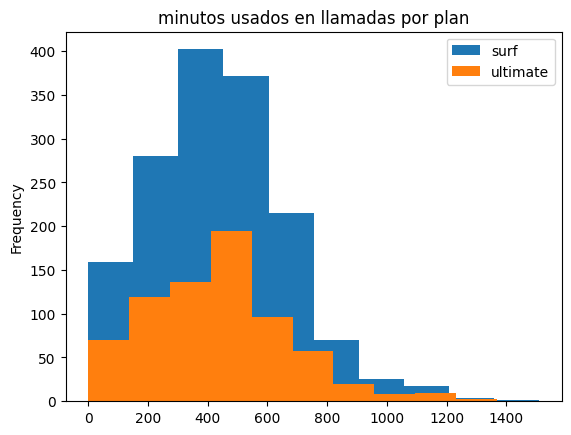

In [100]:
plans = ['surf','ultimate']
import matplotlib.pyplot as plt
for plan in plans: 
     consumo_planes[consumo_planes['plan']== plan]['minutos usados'].plot(kind='hist', title ='minutos usados en llamadas por plan')
        
plt.legend(plans)
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.

[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [101]:
# Calcula la media y la varianza de la duración mensual de llamadas.
consumo_planes['minutos usados'].mean()


435.9375553587245

In [102]:
np.var(consumo_planes['minutos usados'])

53787.33666754012

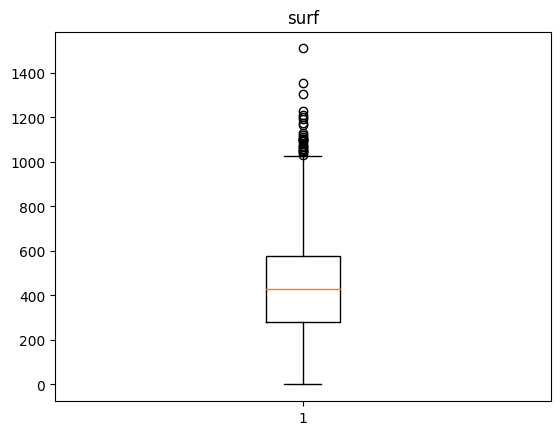

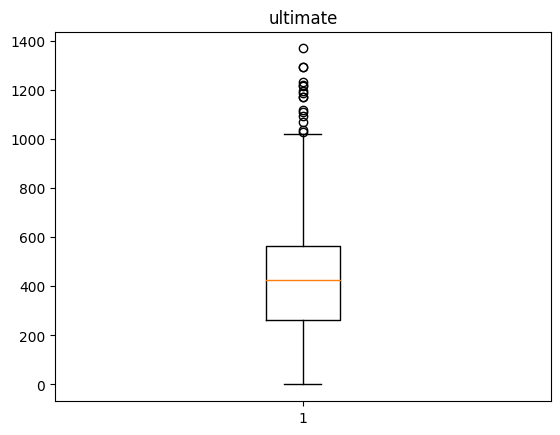

In [103]:
plans = ['surf','ultimate']

for plan in plans: 
    plt.boxplot(consumo_planes[consumo_planes['plan'] == plan]['minutos usados'].dropna())# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
    plt.title(plan)
    plt.show()


Parece que la frecuencia de los minutos usados en llamadas por el plan surf son mucho mayores a los delplan ultimate! 
aunque podemos ver que nuestra duración de llamadas es muy similar entre ambos planes, pues la media de ambas se encuentran un poco arriba de los 400 minutos. 

### Mensajes

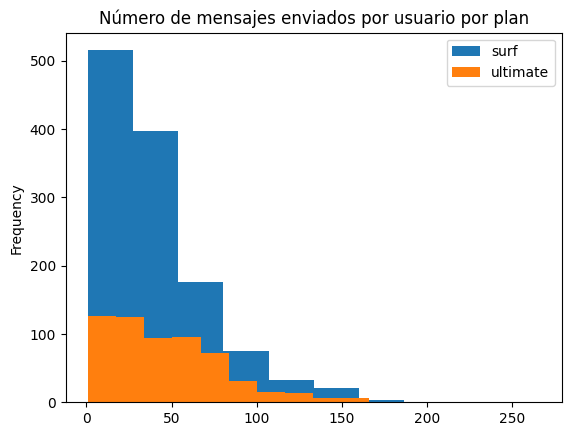

In [104]:
import matplotlib.pyplot as plt
plans = ['surf','ultimate']

for plan in plans: 
     consumo_planes[consumo_planes['plan']== plan]['cantidad_de_mensajes'].plot(kind='hist', title ='Número de mensajes enviados por usuario por plan')
        
plt.legend(plans)# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan


In [105]:
consumo_planes['cantidad_de_mensajes'].mean()

42.110188261351055

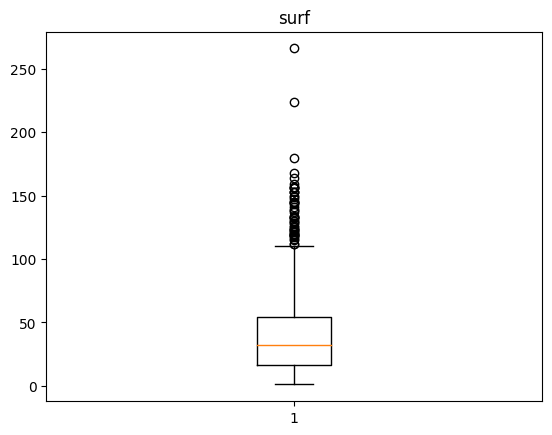

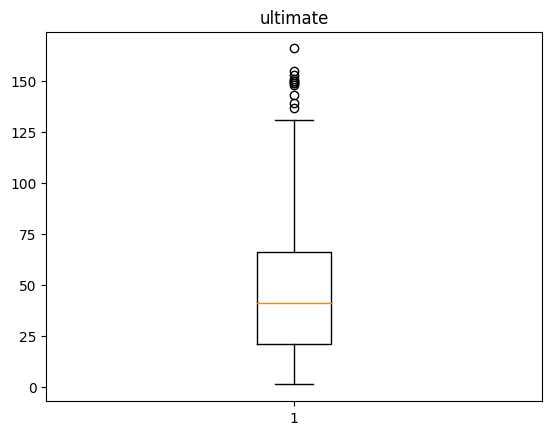

In [106]:
plans = ['surf','ultimate']

for plan in plans: 
    plt.boxplot(consumo_planes[consumo_planes['plan'] == plan]['cantidad_de_mensajes'].dropna())# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
    plt.title(plan)
    plt.show()

Nuevamente el plan surf tiene más uso de los mensajes que envian, sera por que hay más usuarios ahí?  
aunque podemos ver que el envio de mensaje es muy similar entre ambos planes, pues la media de ambas se encuentran un poco por debajo de los 50 mensajes enviados.

### Internet

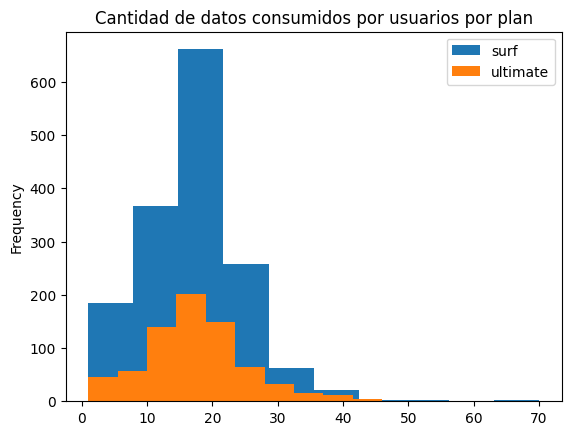

In [107]:
import matplotlib.pyplot as plt
plans = ['surf','ultimate']

for plan in plans: 
     consumo_planes[consumo_planes['plan']== plan]['datos_usados_gb'].plot(kind='hist', title ='Cantidad de datos consumidos por usuarios por plan')
        
plt.legend(plans)
plt.show()


In [108]:
consumo_planes['datos_usados_gb'].mean()

16.989020641194553

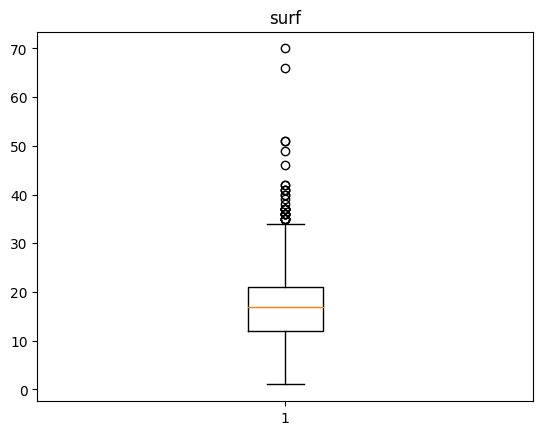

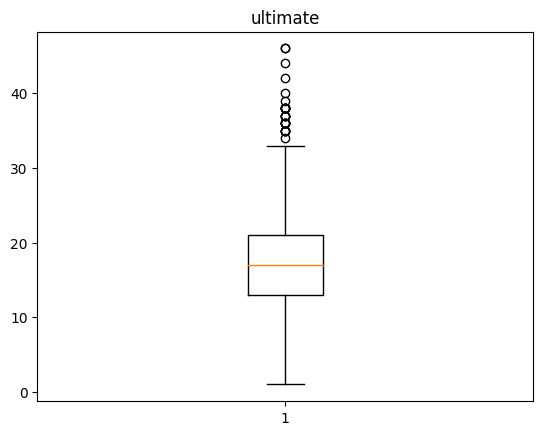

In [109]:
for plan in plans: 
    plt.boxplot(consumo_planes[consumo_planes['plan'] == plan]['datos_usados_gb'].dropna())# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
    plt.title(plan)
    plt.show()

El plan surf tiene más trafico de datos, sera por que hay más usuarios ahí?  
aunque podemos ver que el trafico de internet es muy similar entre ambos planes, pues la media de ambas se encuentran en medio de los valores 10 y 20, siendo 16gb el promedio del uso de datos.

## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

In [110]:
plans = ['surf','ultimate']

for plan in plans: 
    rentabilidad = consumo_planes[consumo_planes['plan'] == plan]['Total_a_pagar'].sum()
    rentabilidad_promedio_mensual = consumo_planes[consumo_planes['plan'] == plan]['Total_a_pagar'].mean()
    print(f'la rentabilidad total del plan {plan} es de: {rentabilidad}')
    print(f'la rentabilidad mensual promedio del plan {plan} es de: {rentabilidad_promedio_mensual}')

la rentabilidad total del plan surf es de: 95611.18
la rentabilidad mensual promedio del plan surf es de: 60.551728942368584
la rentabilidad total del plan ultimate es de: 52346.0
la rentabilidad mensual promedio del plan ultimate es de: 72.3011049723757


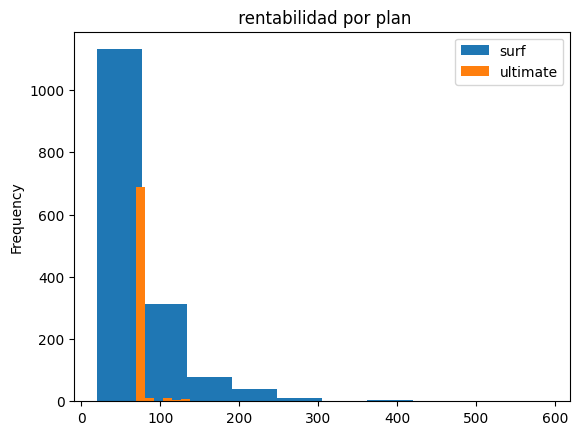

In [111]:
plans = ['surf','ultimate']

for plan in plans: 
     consumo_planes[consumo_planes['plan']== plan]['Total_a_pagar'].plot(kind='hist', title =' rentabilidad por plan')
        
plt.legend(plans)
plt.show()


In [112]:
 consumo_planes

,user_id,mes,minutos usados,llamadas hechas,cantidad_de_mensajes,datos_usados,datos_usados_gb,plan,city,minutos_cobrables,cargo_extra_minutos,messages_cobrables,cargo_extra_messages,datos_cobrables,cargo_extra_datos,Total_a_pagar
0,1000,12.0,124.0,16.0,11.0,1901.47,2.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",0.0,0.0,0.0,0.00,0.0,0.0,70.00
1,1001,8.0,182.0,27.0,30.0,6919.15,7.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0,0.0,0.0,0.00,0.0,0.0,20.00
2,1001,9.0,315.0,49.0,44.0,13314.82,14.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0,0.0,0.0,0.00,0.0,0.0,20.00
3,1001,10.0,393.0,65.0,53.0,22330.49,22.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0,0.0,3.0,0.09,7.0,70.0,90.09
4,1001,11.0,426.0,64.0,36.0,18504.30,19.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",0.0,0.0,0.0,0.00,4.0,40.0,60.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,1307,NaN,NaN,NaN,NaN,NaN,NaN,surf,"Boston-Cambridge-Newton, MA-NH MSA",0.0,0.0,0.0,0.00,0.0,0.0,20.00
2299,1319,NaN,NaN,NaN,NaN,NaN,NaN,surf,"Colorado Springs, CO MSA",0.0,0.0,0.0,0.00,0.0,0.0,20.00
2300,1378,NaN,NaN,NaN,NaN,NaN,NaN,surf,"Denver-Aurora-Lakewood, CO MSA",0.0,0.0,0.0,0.00,0.0,0.0,20.00
2301,1463,NaN,NaN,NaN,NaN,NaN,NaN,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",0.0,0.0,0.0,0.00,0.0,0.0,70.00


Se puede observar que la rentabilidad total de surf es significativamente mayor a la del plan ultimate, más de unos $40,000de diferencia, sin embargo es mucho más interesante que la rentabilidad promedio mensual es mucho más alta en ultimate que en surf!

Puede que más usuarios tengan elplan surf pero quien más ingresos den por mes sean los del ultimate?

## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [113]:
alpha =0.05
sample_1 =  consumo_planes.query('plan == "surf"')['Total_a_pagar'] # Prueba las hipótesis



In [114]:
sample_1

1       20.00
2       20.00
3       90.09
4       60.00
5       60.00
        ...  
2295    20.00
2298    20.00
2299    20.00
2300    20.00
2302    20.00
Name: Total_a_pagar, Length: 1579, dtype: float64

In [115]:
sample_2 = consumo_planes.query('plan == "ultimate"')['Total_a_pagar']

In [116]:
sample_2

0       70.0
19      70.0
20      84.0
26      70.0
27      70.0
        ... 
2292    70.0
2293    70.0
2296    70.0
2297    70.0
2301    70.0
Name: Total_a_pagar, Length: 724, dtype: float64

 **H0= los promedios mensuales del plan surf son iguales**
 
 **H1= los promedios mensuales del plan surf son diferentes**

In [117]:

resultados = st.ttest_ind(sample_1,sample_2,equal_var=False)

print(f'p-value:{resultados.pvalue}')

p-value:1.218411585212325e-15


In [118]:
if resultados.pvalue < alpha:
    print('Podemos rechazar la hipotesis nula')
else: 
    print('No podemos rechazar la hipotesis nula')

Podemos rechazar la hipotesis nula


[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

In [119]:
NY_NJ = consumo_planes[consumo_planes.city.str.contains('NY-NJ')]

In [120]:
rentabilidad_nynj = NY_NJ['Total_a_pagar'].sum()
rentabilidad_promedio_mensual_nynj = NY_NJ['Total_a_pagar'].mean()
print(f'la rentabilidad total en la region NY-NJ es de:{rentabilidad_nynj}')
print(f'la rentabilidad promedio mensual en la region NY-NJ es de:{rentabilidad_promedio_mensual_nynj }')

la rentabilidad total en la region NY-NJ es de:22660.35
la rentabilidad promedio mensual en la region NY-NJ es de:59.94801587301587


In [121]:
otras_regiones = consumo_planes [~consumo_planes.city.str.contains ('NY-NJ')]

In [122]:
rentabilidad_otras_regiones = otras_regiones ['Total_a_pagar'].sum()
rentabilidad_promedio_otrasd_regiones = otras_regiones ['Total_a_pagar'].mean()
print(f'la rentabilidad total en otras regiones es de:{rentabilidad_otras_regiones}')
print(f'la rentabilidad promedio mensual en otras regiones es de:{rentabilidad_promedio_otrasd_regiones}')

la rentabilidad total en otras regiones es de:125296.83
la rentabilidad promedio mensual en otras regiones es de:65.08926233766233


[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [123]:
alpha =0.05 
sample_3 = NY_NJ['Total_a_pagar']

In [124]:
sample_3

56       20.00
57       38.84
75       20.00
76      100.00
77       20.00
         ...  
2264    120.42
2265    170.27
2266    200.00
2267    110.33
2297     70.00
Name: Total_a_pagar, Length: 378, dtype: float64

In [125]:
sample_4 = otras_regiones['Total_a_pagar']

In [126]:
sample_4

0       70.00
1       20.00
2       20.00
3       90.09
4       60.00
        ...  
2298    20.00
2299    20.00
2300    20.00
2301    70.00
2302    20.00
Name: Total_a_pagar, Length: 1925, dtype: float64

**H0 = los promedios mensuales entre la region NY-NJ y otras regiones son iguales** 

**H1 = los promedios mensuales entre la region NY-NJ y otras regiones son diferentes** 

In [127]:
# Prueba las hipótesis
#H0 = los promedios mensuales entre la region NY-NJ y otras regiones son iguales

resultados_regiones = st.ttest_ind(sample_3,sample_4,equal_var=False)

print(f'p-value:{resultados.pvalue}')


p-value:1.218411585212325e-15


In [128]:
if resultados_regiones.pvalue < alpha:
    print('Podemos rechazar la hipotesis nula')
else: 
    print('No podemos rechazar la hipotesis nula')

Podemos rechazar la hipotesis nula


## Conclusión general

[En esta sección final, enumera tus conclusiones importantes. Asegúrate de que estas abarquen todas las decisiones (suposiciones) importantes que adoptaste y que determinaron la forma elegida para procesar y analizar los datos.]

Parece ser que el plan surf contiene más usuarios, por lo que aparentemente es el que genera más dinero, sin embargo se pudo demostrar que el plan que tiene un promedio de imgresos mensuales más alto es el plan ultimate, al tener menos usuarios genera menos dinero total, pero los ingresos mensuales de este son mucho mayores al surf. 

Parece ser que el uso de beneficios es un muy buen ingreso a la compañia, ya que se encontraron en todas un porcentaje de usuarios que sobrepasaban los beneficios incluidos en su plan, y principallemnte se vio en internet: 

El 24% de usuarios se les cobrara minutos, ya que han pasado lo otorgado por el plan que tienen.
En cuanto a mensajes ,Se cobra 14% de los usuarios, ya que han pasado el numero de mensajes.
y el 41 % de los usarios se han excedido en los datos utilizados, pues se han acabado los que el plan otorgaba y tendran un cargo extra. 




Al realizar una prueba por regiones donde unicamente se excluian a la region NY-NJ, de las demás (72), no era de sorprender que las otras regiones tuvieran un total de ingresos más alto que el de solo una, la diferencia era más de una quinta parte. 
Lo realmente sorprendente fue que el promedio mensual fue más alto e